In [7]:
import sqlite3
from sqlite3 import OperationalError
import pandas as pd

conn = sqlite3.connect("C:\\Users\\jyhah\\Downloads\\database.sqlite")
head_df = pd.read_sql_query("select * from Salaries;", conn)
head_df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411,0,400184,,567595.43,567595.43,2011,,San Francisco,
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966,245132,137811,,538909.28,538909.28,2011,,San Francisco,
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739,106088,16452.6,,335279.91,335279.91,2011,,San Francisco,
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916,56120.7,198307,,332343.61,332343.61,2011,,San Francisco,
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134402,9737,182235,,326373.19,326373.19,2011,,San Francisco,


In [10]:
pd.read_sql_query("""select BasePay, OvertimePay, OtherPay, Benefits, TotalPay, TotalPayBenefits from Salaries
                    group by ID 
                    order by ID
                    limit 10""", conn)

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits
0,167411.18,0.00,400184.25,,567595.43,567595.43
1,155966.02,245131.88,137811.38,,538909.28,538909.28
2,212739.13,106088.18,16452.60,,335279.91,335279.91
3,77916.00,56120.71,198306.90,,332343.61,332343.61
4,134401.60,9737.00,182234.59,,326373.19,326373.19
5,118602.00,8601.00,189082.74,,316285.74,316285.74
6,92492.01,89062.90,134426.14,,315981.05,315981.05
7,256576.96,0.00,51322.50,,307899.46,307899.46
8,176932.64,86362.68,40132.23,,303427.55,303427.55
9,285262.00,0.00,17115.73,,302377.73,302377.73


In [11]:
head_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
Id                  148654 non-null int64
EmployeeName        148654 non-null object
JobTitle            148654 non-null object
BasePay             148654 non-null object
OvertimePay         148654 non-null object
OtherPay            148654 non-null object
Benefits            148654 non-null object
TotalPay            148654 non-null float64
TotalPayBenefits    148654 non-null float64
Year                148654 non-null int64
Notes               148654 non-null object
Agency              148654 non-null object
Status              148654 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 14.7+ MB


In [13]:
#Checking null values
head_df.columns[head_df.isnull().any()]

Index([], dtype='object')

In [15]:
%matplotlib inline
#Checking for outliers and quartiles
q_df = head_df.quantile([.25, .75])
q_df.loc['iqr'] = q_df.loc[0.75] - q_df.loc[0.25]
q_df.loc['whisker_length'] = 1.5 * q_df.loc['iqr']
q_df.loc['max_whisker'] = q_df.loc['whisker_length'] + q_df.loc[0.75]
q_df.loc['min_whisker'] = q_df.loc[0.25] - q_df.loc['whisker_length']
q_df

,Id,TotalPay,TotalPayBenefits,Year
0.25,37164.25,36168.995,44065.65,2012.0
0.75,111490.75,105839.135,132876.45,2014.0
iqr,74326.50,69670.140,88810.80,2.0
whisker_length,111489.75,104505.210,133216.20,3.0
max_whisker,222980.50,210344.345,266092.65,2017.0
min_whisker,-74325.50,-68336.215,-89150.55,2009.0


In [17]:
import numpy as np
std_inc = head_df['TotalPayBenefits'].std()
std_inc

62793.53348323814

In [18]:
maxoutliertpb = head_df['TotalPayBenefits'].mean() + (std_inc * 3)
maxoutliertpb
#Calculating max outlier for T P B

282073.1552602828

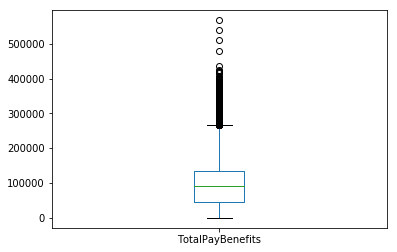

In [20]:
bbox = head_df['TotalPayBenefits'].plot(kind="box")
#There are outliers here, as indicated by graph and box, but we can choose to keep them in our sample for visualization.

C:\Users\jyhah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


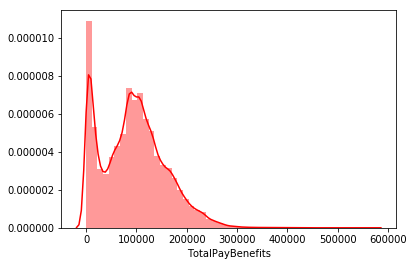

In [21]:
import seaborn as sns
sns.distplot(head_df.TotalPayBenefits, color = 'red', kde=True)

In [ ]:
#This shows a good distribution of salaries across the board in SF